**K-Means - Examine performance in the ideal case**

This is achieved by the following steps:
* Generate sample dataset using *make_blobs* with the properties below:
 * Clusters are well-separated 
 * Clusters have similar number of points
 * Clusters have similar variance
 * Clusters have isotropic/spherical variance
* Run KMeans on this dataset
* Examine classification metrics to evaluate 'goodness' of classification


In [27]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import sklearn
print 'sklearn.version = ', sklearn.__version__

import numpy as np
print 'numpy.version = ', np.__version__
import pandas as pd
print 'pandas.version = ', pd.__version__

import matplotlib
print 'matplotlib.version = ', matplotlib.__version__
import matplotlib.pyplot as plt

import seaborn as sns
print 'seaborn.version = ', sns.__version__

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics


sklearn.version =  0.18
numpy.version =  1.11.2
pandas.version =  0.19.1
matplotlib.version =  1.5.3
seaborn.version =  0.7.1


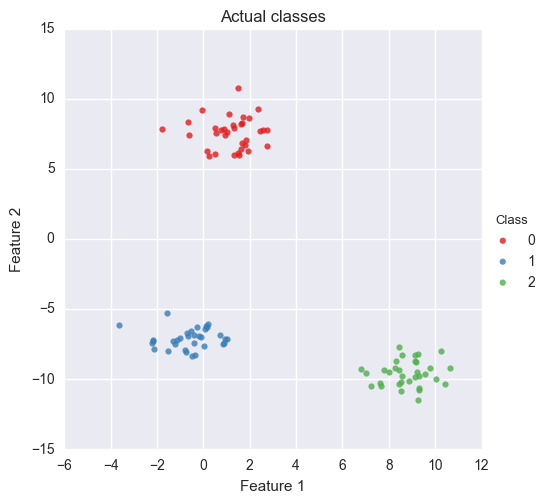

In [28]:
# ----------
# Generate sample dataset for clustering
# ----------

X, actual_classes = make_blobs(n_samples=100, n_features=2, centers=3, random_state=13112016)
df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': actual_classes
    }).round(2)

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df, hue='Class', palette='Set1', fit_reg=False)
plt.title('Actual classes');


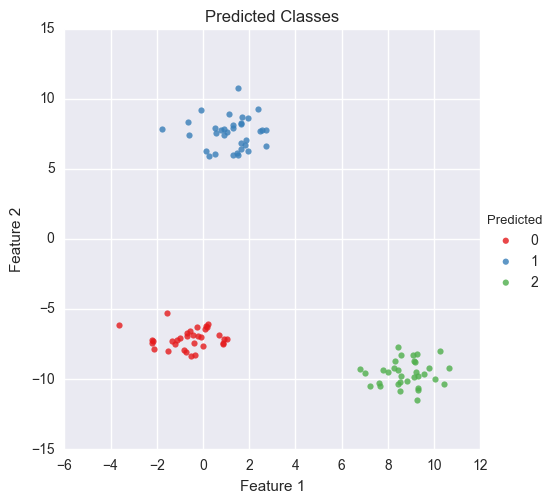

In [29]:
# ----------
# Cluster data using KMeans
# ----------

kmeans_est = KMeans(n_clusters=3).fit(X)
predicted_classes = kmeans_est.labels_

df_predicted = pd.DataFrame({
        'Feature 1':df['Feature 1'], 
        'Feature 2':df['Feature 2'], 
        'Predicted':predicted_classes
    })

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df_predicted, hue='Predicted', palette='Set1', fit_reg=False)
plt.title('Predicted Classes');


In [31]:
# ----------
# Evaluate KMeans clustering using various metrics
# ----------

# Adjusted Rand Index
# - measures similarity of 2 cluster assignments
# - invariant to permutation of class labels
# - score ranges from -1 to 1
# - higher values => the 2 cluster assignments are more similar with 1.0 => cluster assignments are identical (but labels may not match)
# - can be used to compare cluster assignments from 2 methods with different assumptions of data structure
print 'Adjusted Rand Index = ', metrics.adjusted_rand_score(actual_classes, predicted_classes)

# Adjusted Mutual Information score

# Homogeneity & Completeness scores & V measure

# Fowlkes-Mallows score

# Sihouette Coefficient

# Calinski-Harabaz Index


Adjusted Rand Index =  1.0
